<a href="https://colab.research.google.com/github/sasumwen/DogVision/blob/main/dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision"

# End-to-end multi-class dog breed classification

This notebook builds an end2end multiclass dog breed classification using tensorflow hub and tensorflow 2.0

data is got from kaggle dog breed identification competition

In [4]:
# import TensorFlow and tf hub into colab
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__) 
print(hub.__version__)

2.9.2
0.12.0


In [5]:
# check for GPU availability
print("GPU available" if tf.config.list_physical_devices("GPU")else "not available")

GPU available


## Getting the data ready
(turning into tensors)

In [6]:
# checkout data labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")

In [7]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


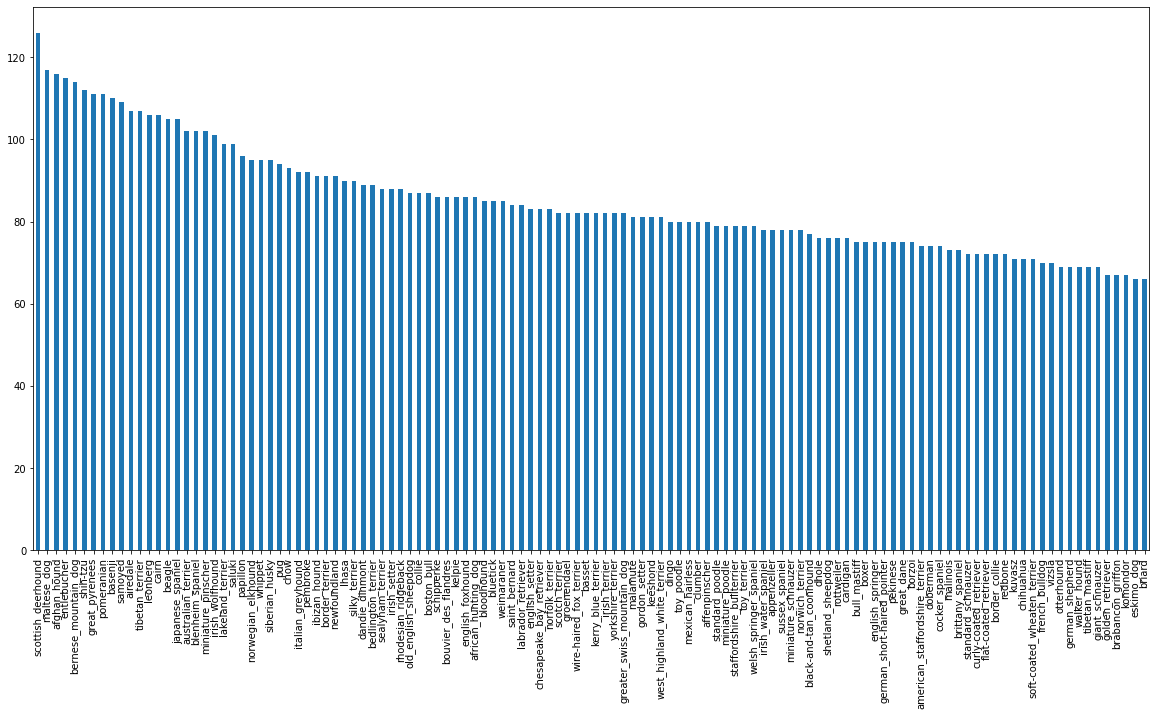

In [8]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

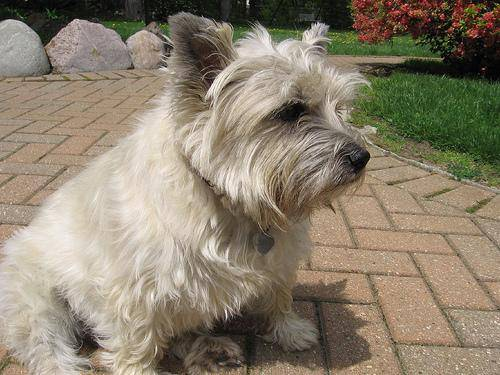

In [9]:




#view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg")

# Getting images and their labels



In [10]:
# create pathnames from image ID's

filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [11]:
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("proceed")
else:
  print("error")
  

proceed


In [13]:
len(filenames)

10222

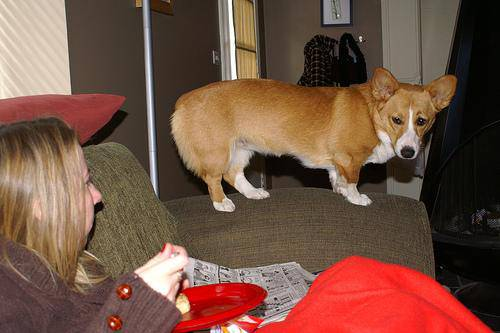

In [14]:
Image(filenames[10000])

In [15]:
labels_csv["breed"][10000]

'pembroke'

## Preparing labels

In [16]:
import numpy as np
labels = labels_csv["breed"].to_numpy()

In [17]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
#check if labels matches filenames in length
if len(labels) == len(filenames):
  print("on track")
else:
  print('error')

on track


In [19]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [20]:
#turn a single label into an array of booleans
print(labels[10])
labels[10] == unique_breeds

shetland_sheepdog


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
#turn every label into a bool array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
#turning boolean array into intergers
print(labels[10]) #example label
print(np.where(unique_breeds == labels[10])) #index where example label occurs
print(boolean_labels[10].argmax()) #index where label occurs in boolean array
print(boolean_labels[10].astype(int)) ##assignin g a "1" where example label occurs

shetland_sheepdog
(array([99]),)
99
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## creating a validation set

Note that the data gotten from kaggle didnt provide a validation set

In [23]:
# setup X&y labels
X = filenames
y = boolean_labels

Advise is to start off experimemnt with ~1000  images and increae as needed


In [24]:
# ser number of images to use for experimemnting 
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [25]:
#spliting data into train and validation
from sklearn.model_selection import train_test_split

np.random.seed(84)
#split into training and validatiion of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2)


## preprocessing images (turning images into tensors)

turning images into tensors to preprocess our images into tensors we are going to write a function which does a few things

1. Take an image filepath as input
2. Use TF to read the fle and save it to a variable "image
3. Turn "image" (a jpg) into Tensors
4. normalize our image (convert color channel values from 0-255 to 0-1
5. Resize the "image" to be a shape of (224,224)
6. return the modified "image"

In [26]:
#convert image to numpy array

from matplotlib.pyplot import imread
image = imread(filenames[10])
image.shape


(500, 375, 3)

In [27]:
print(image[:2].shape)
image[:2]

(2, 375, 3)


array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)

In [28]:
#turn into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  67,  71],
        [ 78,  72,  76],
        [ 73,  67,  71]]], dtype=uint8)>

In [29]:
#define image size
IMG_SIZE = 224

# create a function for preprocessing image

def process_image(image_path, img_size = IMG_SIZE):
  """
  takes an image file path anf turns the image into  a tensor
  """
  #read in an image file
  image = tf.io.read_file(image_path)

  #turn the jpg into numerical tensor with 3 color channels RGB
  image = tf.image.decode_jpeg(image, channels=3)

  #convert the color channel values from 0-255 to 0-1values
  image = tf.image.convert_image_dtype(image, tf.float32)

  #resize the image to desired value(224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning data into batches

WHY? in trying to process say.. 10,000 images in one go, they all might not fit into memory

hence lecun adviced we do about 32 images at a time

in order to use TF effectively data wshould be in the form of Tensor tuples such as (image, label)

In [30]:
# create a simple functiion to return a tuple of tensors(image, label)

def get_image_label(image_path, label):
  """
  takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  
  image = process_image(image_path)
  return image, label

Now we have a wAY TO turn dta into tuples of tensors in the form, (image, tuples) now we make a function to turn all into batches

In [35]:
#define the batch size
BATCH_SIZE = 32

#create a function to turn data in batches
def create_data_batches(X,y= None, batch_size = BATCH_SIZE, valid_data=False, test_data= False):
  """
  creates batches of data out of image(X) and label(y) pairs
  shuffles the data if its a training data but doesnt shuffe validation data
  also accepts test data as input(no labels)
  """
  # if the data is a test dataset, we prob dont have labels
  if test_data:
    print("Creating test data batches...")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # if data is in valid dataset, no need to shuffle
  elif valid_data:
    print("creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  #if in train dataset
  else:
    print("creating training data batches...")

    #turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    #shuffling pathnames and labels before mapping iage processor dunction is faster than shuffling images
    data = data.shuffle(buffer_size= len(X))

    # create (image, label) tuples (this also turns the image path into a preprocessed image)
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
  return data_batch

In [36]:
# create training and validation data
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

creating training data batches...
creating validation data batches...


## visualizing data batches

In [41]:
import matplotlib.pyplot as plt

#create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  dsplays a plot of 25 images and their labels from a data batch
  """

  #setup the figure
  plt.figure(figsize= (10,10))

  #loop through 25(for disp 25 image)
  for i in range(25):
    #create subplots(5 rows, 5 columns)
    ax = plt.subplot(5,5,  i+1)
    #disp an image
    plt.imshow(images[i])
    #add th eimage lable as title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [42]:
train_images, train_labels = next(train_data.as_numpy_iterator())

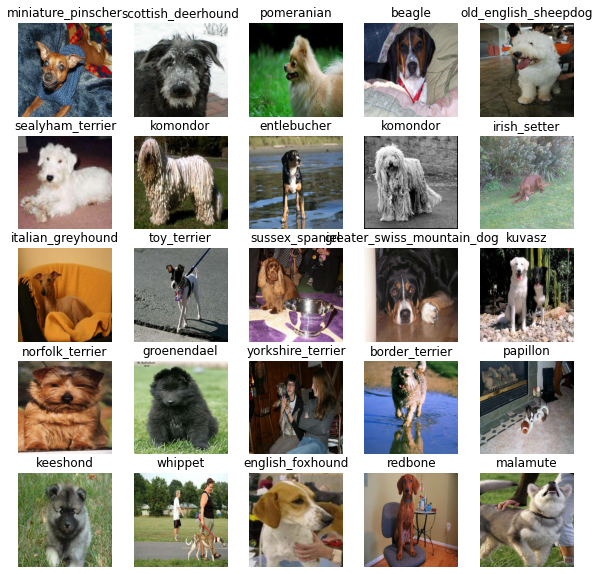

In [43]:
# now lets visualise in a trainign batch
show_25_images(train_images, train_labels)

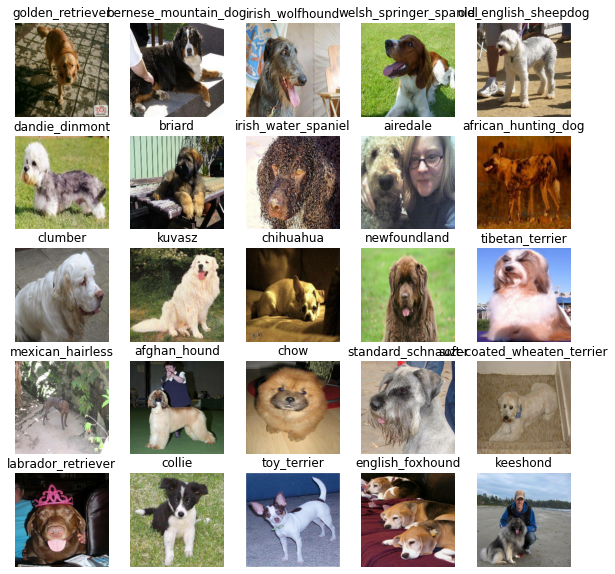

In [44]:
# now visualize valid batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)